### Machine learning: Train a linear autoregressive model
##### Data set: ECAD temperature data from Berlin-Tempelhof

#### 1. add one time-lagged feature

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Import data set including remainder
df = pd.read_csv('../data/flights_remainder.csv', index_col=0, parse_dates=True)

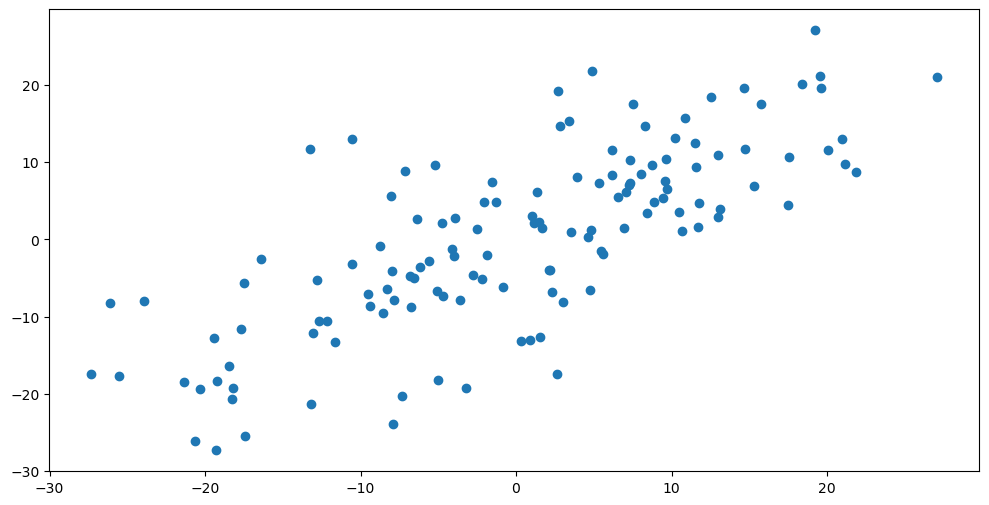

In [3]:
# Add new feature
df['lag1'] = df['remainder'].shift(1)
plt.scatter(x='remainder', y='lag1', data=df)

In [4]:
df.corr()

,remainder,lag1
remainder,1.000000,0.758226
lag1,0.758226,1.000000


<AxesSubplot:>

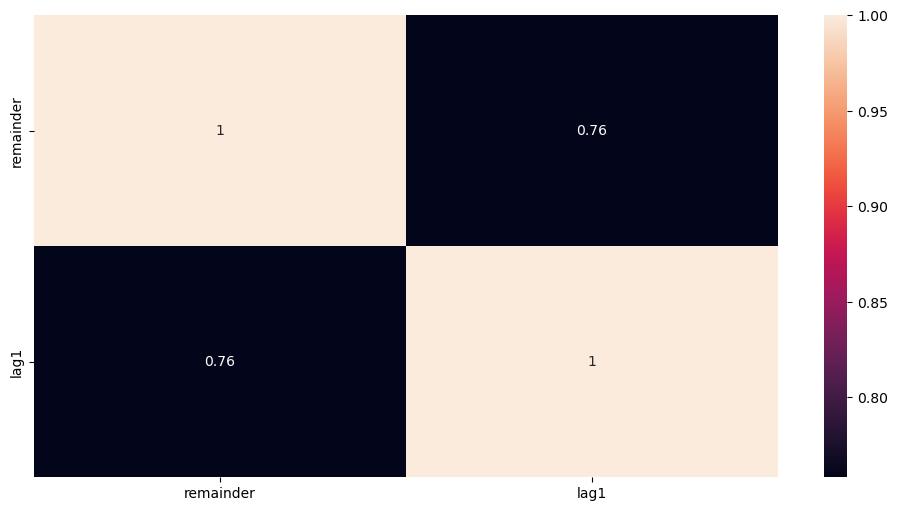

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
df.dropna(inplace=True)

In [9]:
X = df[['lag1']] # this is y_(t-1)
y = df['remainder'] # this is y_t

X.shape, y.shape

((131, 1), (131,))

In [10]:
m = LinearRegression()
m.fit(X, y)
df['prediction_ar1'] = m.predict(X)

<AxesSubplot:xlabel='date'>

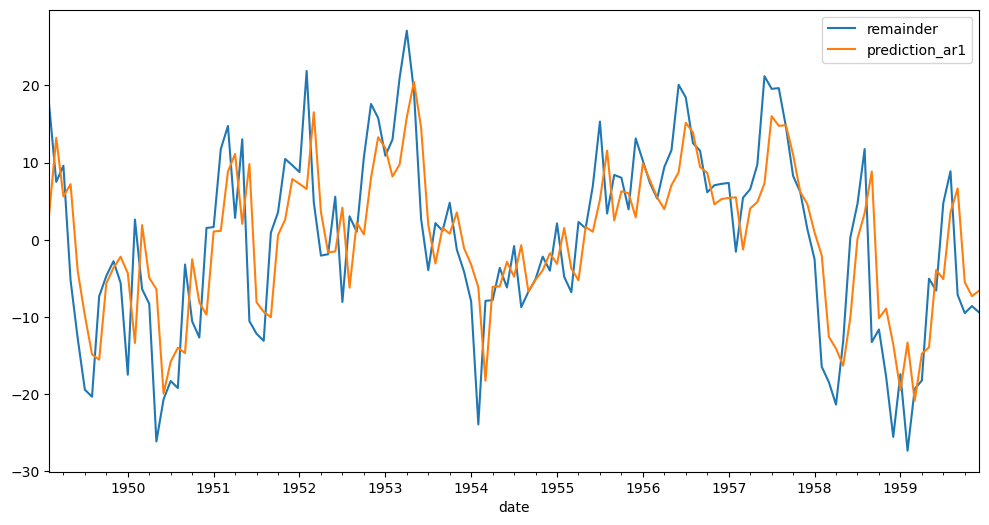

In [14]:
df[['remainder', 'prediction_ar1']].plot()

In [15]:
m.coef_, m.intercept_

(array([0.75966123]), -0.0881690619877312)

<AxesSubplot:xlabel='date'>

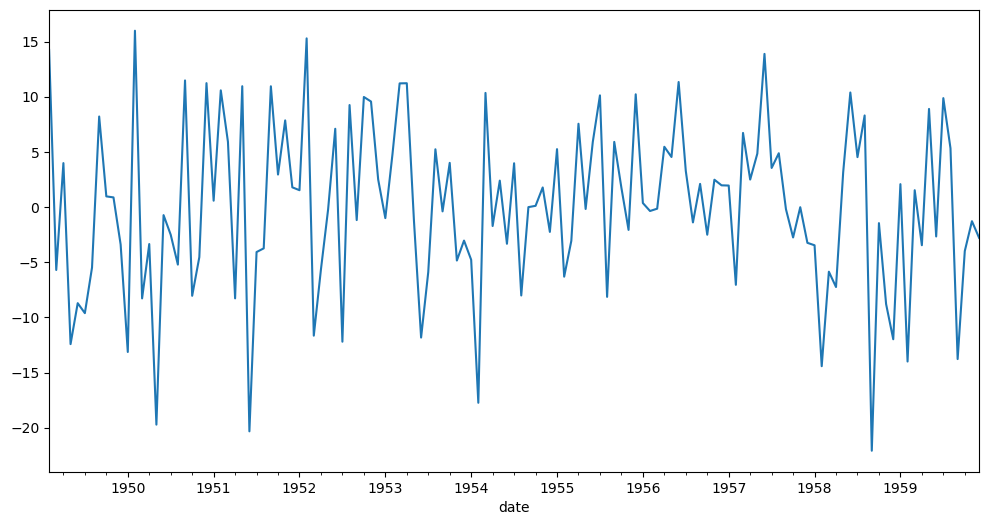

In [16]:
(df['remainder'] - df['prediction_ar1']).plot()

<AxesSubplot:xlabel='date'>

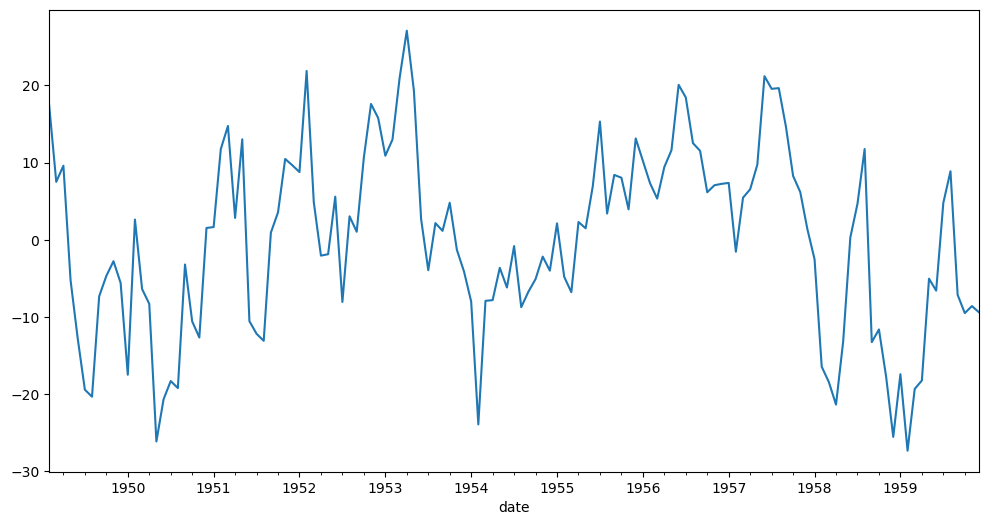

In [17]:
df['remainder'].plot()

#### 2. add more lags

In [18]:
df['lag2'] = df['remainder'].shift(2)

In [19]:
round(df[['remainder', 'lag1', 'lag2']].corr(), 2)

,remainder,lag1,lag2
remainder,1.00,0.76,0.60
lag1,0.76,1.00,0.76
lag2,0.60,0.76,1.00


<AxesSubplot:>

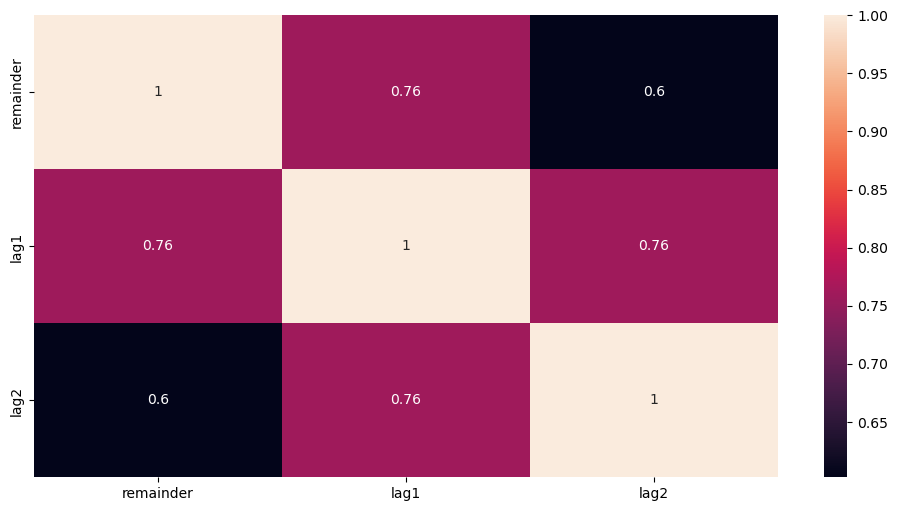

In [20]:
sns.heatmap(df[['remainder', 'lag1', 'lag2']].corr(), annot=True)

### Calculate how many lags to use:
#### 1. using Partial Autocorrelation Function (PACF)

/Users/lisakalfhues/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


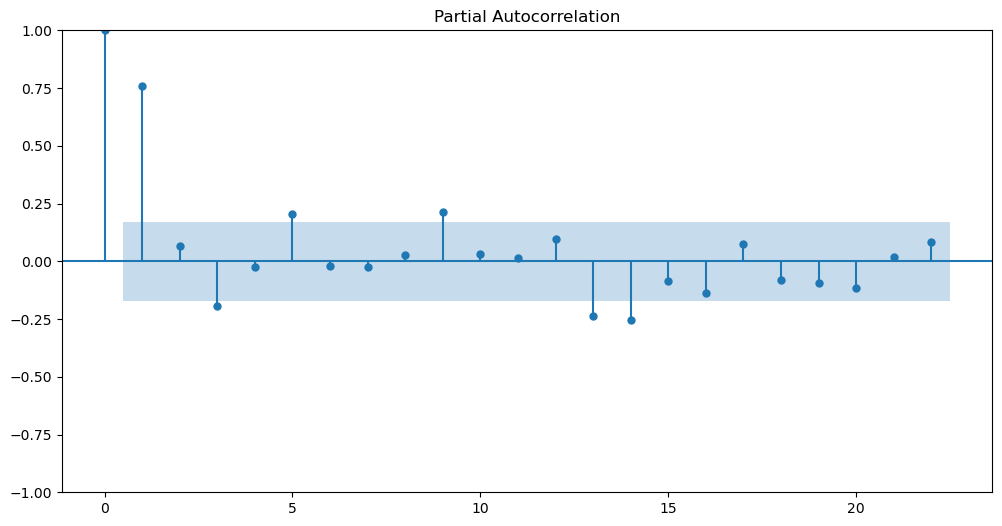

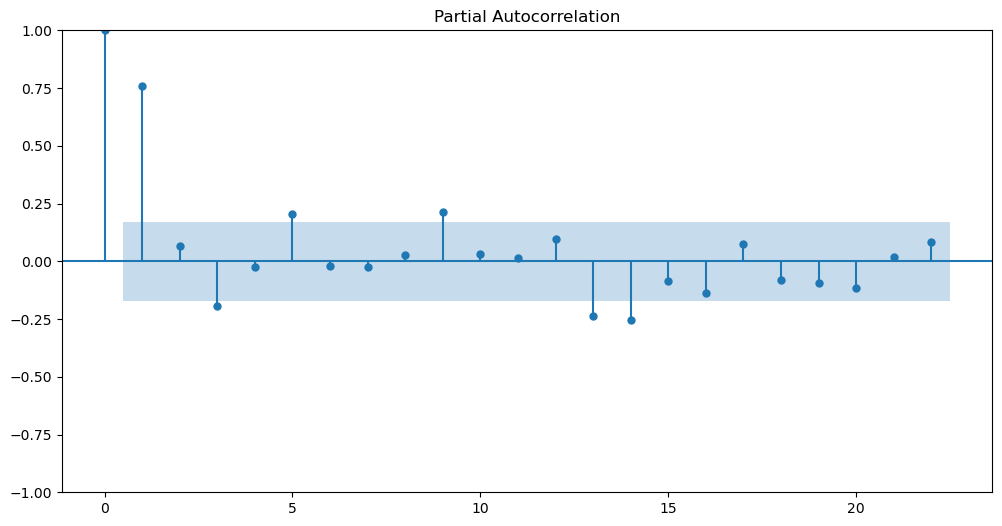

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['remainder'])

#### 2. using statsmodels functionality

In [22]:
# Select order of lags to include
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

selected_order = ar_select_order(df['remainder'], maxlag=12)
selected_order.ar_lags

In [25]:
# Explore evaluation of maxlag = 12 using BIC
selected_order.bic

{(1,): 831.670542448461,
 (1, 2): 835.5283355244935,
 (1, 2, 3): 837.1326256585284,
 (1, 2, 3, 4): 841.6817706678057,
 (1, 2, 3, 4, 5): 844.0306579207244,
 (1, 2, 3, 4, 5, 6): 848.705495400976,
 (1, 2, 3, 4, 5, 6, 7): 853.473134176523,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): 855.5748309840717,
 (1, 2, 3, 4, 5, 6, 7, 8): 857.9512030122077,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): 860.1503308296709,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): 864.6447600955229,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): 868.8775898785603,
 0: 929.8005115791844}

In [26]:
# Run autoregression model with those lags
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(endog=df['remainder'], lags=1).fit()

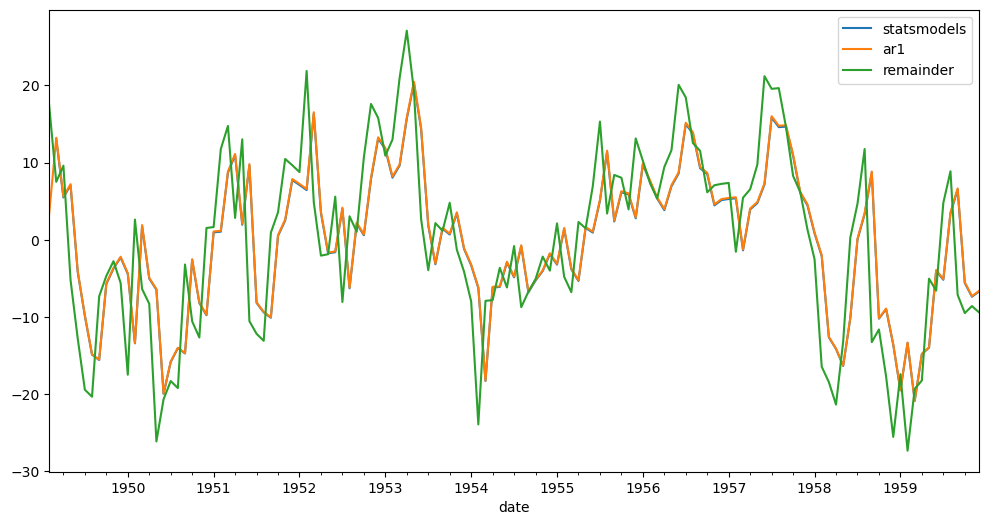

In [28]:
ar_model.predict().plot(label='statsmodels')
df['prediction_ar1'].plot(label='ar1')
df['remainder'].plot(label='remainder')
plt.legend()